In [1]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b6c16149cba924d730ca86bc8fb09252b0f72c539cd417e08222852970321a59
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import RegressionEvaluator
import numpy as np

https://www.kaggle.com/datasets/tanay001/nseindia-futures-options-daily/data

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d tanay001/nseindia-futures-options-daily
! unzip nseindia-futures-options-daily.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open nseindia-futures-options-daily.zip, nseindia-futures-options-daily.zip.zip or nseindia-futures-options-daily.zip.ZIP.


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.config('spark.driver.memory', '10g').appName('Future and Option Data Analysis').getOrCreate()


In [ ]:

# Load your dataset
data = spark.read.csv("fobhav.csv", header=True, inferSchema=True)


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
data.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- STRIKE_PR: string (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: string (nullable = true)
 |-- HIGH: string (nullable = true)
 |-- LOW: string (nullable = true)
 |-- CLOSE: string (nullable = true)
 |-- SETTLE_PR: string (nullable = true)
 |-- CONTRACTS: string (nullable = true)
 |-- VAL_INLAKH: string (nullable = true)
 |-- OPEN_INT: string (nullable = true)
 |-- CHG_IN_OI: string (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- Unnamed: 15: string (nullable = true)



In [ ]:
headers = ['INSTRUMENT','SYMBOL','EXPIRY_DT','STRIKE_PR','OPTION_TYP','OPEN','HIGH','LOW','CLOSE','SETTLE_PR','CONTRACTS','VAL_INLAKH','OPEN_INT','CHG_IN_OI','TIMESTAMP','Unnamed']

In [ ]:
import numpy as np
all_options = np.array(data.filter(data['INSTRUMENT'] == 'OPTSTK').select('SYMBOL').distinct().collect()).tolist()
#print all the different stock names
all_option_1d_array = np.reshape(all_options,(1,-1))
all_option_1d_array = all_option_1d_array[0]
print(all_option_1d_array)

['GODREJCP' 'LT' 'ICICIBANK' 'L&TFH' 'IDEA' 'TITAN' 'MINDTREE'
 'TORNTPOWER' 'SRTRANSFIN' 'IBULHSGFIN' 'BOSCHLTD' 'MANAPPURAM' 'PETRONET'
 'PFC' 'DIVISLAB' 'SAIL' 'EXIDEIND' 'HDFCBANK' 'EQUITAS' 'CIPLA'
 'AUROPHARMA' 'MFSL' 'CENTURYTEX' 'BHARATFORG' 'MRF' 'HINDALCO' 'SBILIFE'
 'ZEEL' 'ACC' 'BAJAJ-AUTO' 'BALKRISIND' 'INFY' 'BATAINDIA' 'M&M' 'IGL'
 'POWERGRID' 'ONGC' 'PNB' 'ASHOKLEY' 'NATIONALUM' 'ADANIPORTS'
 'APOLLOHOSP' 'HDFC' 'M&MFIN' 'AMBUJACEM' 'CUMMINSIND' 'UBL' 'RAMCOCEM'
 'BAJFINANCE' 'SIEMENS' 'VOLTAS' 'SRF' 'HAVELLS' 'BPCL' 'TATACONSUM'
 'EICHERMOT' 'HINDPETRO' 'HINDUNILVR' 'ASIANPAINT' 'MOTHERSUMI'
 'MUTHOOTFIN' 'NAUKRI' 'BHEL' 'NCC' 'NTPC' 'RELIANCE' 'NMDC' 'TATAPOWER'
 'COFORGE' 'TVSMOTOR' 'DABUR' 'DLF' 'MARUTI' 'UPL' 'LICHSGFIN' 'NESTLEIND'
 'TECHM' 'CONCOR' 'UJJIVAN' 'INDIGO' 'MCDOWELL-N' 'SUNPHARMA' 'COLPAL'
 'MARICO' 'PVR' 'BHARTIARTL' 'PAGEIND' 'COALINDIA' 'ADANIENT' 'TORNTPHARM'
 'RECLTD' 'TCS' 'CHOLAFIN' 'RBLBANK' 'INDUSINDBK' 'BANDHANBNK'
 'FEDERALBNK' 'HDFCLIFE' 'G

In [ ]:
industry_leader_in_each_sector = ['NAUKRI', 'JUBLFOOD', 'PIIND',
                                  'SIEMENS', 'ULTRACEMCO', 'BHARATIARTL', 'ADANITRANS']

In [ ]:
option_data_LT = data.filter( \
                        (data['SYMBOL'] == 'LT') & \
                        (data['INSTRUMENT'] == 'OPTSTK') &
                        ~(col("OPEN") == 0) &  ~(col("HIGH") == 0) & \
                        ~(col("LOW") == 0) & \
                        ~(col("CLOSE") == 0) & \
                        ~(col("SETTLE_PR") == 0) & \
                        ~(col("CONTRACTS") == 0) & \
                        ~(col("VAL_INLAKH") == 0) & \
                        ~(col("OPEN_INT") == 0) & \
                        ~(col("CHG_IN_OI") == 0)
                        ).collect()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(option_data_LT)

633054

In [ ]:
type(option_data_LT)

list

In [ ]:
import csv
header = ['INSTRUMENT','SYMBOL','EXPIRY_DT','STRIKE_PR','OPTION_TYP','OPEN','HIGH','LOW','CLOSE','SETTLE_PR','CONTRACTS','VAL_INLAKH','OPEN_INT','CHG_IN_OI','TIMESTAMP','Unnamed']
with open('lt_option.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(option_data_LT)


In [ ]:
option_data_LT.count()

643420

In [ ]:
for name in all_option_1d_array

94010

  INSTRUMENT SYMBOL  EXPIRY_DT  STRIKE_PR OPTION_TYP  OPEN  HIGH  LOW   CLOSE  \
0     OPTSTK     LT 2020-09-24      680.0         CE   0.0   0.0  0.0  278.10   
1     OPTSTK     LT 2020-09-24      700.0         CE   0.0   0.0  0.0  260.55   
2     OPTSTK     LT 2020-09-24      720.0         CE   0.0   0.0  0.0  243.45   
3     OPTSTK     LT 2020-09-24      740.0         CE   0.0   0.0  0.0  230.00   
4     OPTSTK     LT 2020-09-24      760.0         CE   0.0   0.0  0.0  210.90   

   SETTLE_PR  CONTRACTS  VAL_INLAKH  OPEN_INT  CHG_IN_OI    TIMESTAMP  Unnamed  
0     266.85        0.0         0.0       0.0        0.0  31-AUG-2020      NaN  
1     246.90        0.0         0.0       0.0        0.0  31-AUG-2020      NaN  
2     227.00        0.0         0.0       0.0        0.0  31-AUG-2020      NaN  
3     207.10        0.0         0.0    3300.0        0.0  31-AUG-2020      NaN  
4     187.35        0.0         0.0       0.0        0.0  31-AUG-2020      NaN  
                           

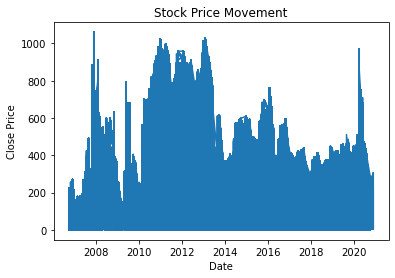

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('lt_option.csv')

# Convert 'EXPIRY_DT' to datetime with mixed format
data['EXPIRY_DT'] = pd.to_datetime(data['EXPIRY_DT'], format='mixed', dayfirst=True)

# Perform basic EDA
print(data.head())
print(data.describe())

# Plot stock price movements over time
plt.plot(data['EXPIRY_DT'].values, data['CLOSE'].values)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Movement')
plt.show()


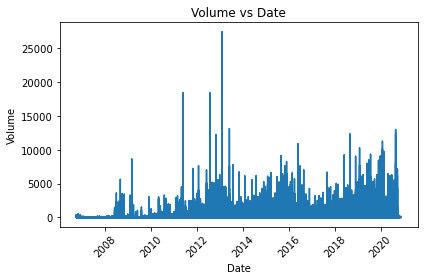

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data_1 = pd.read_csv('lt_option.csv')

# Convert 'EXPIRY_DT' to datetime with mixed format
data_1['EXPIRY_DT'] = pd.to_datetime(data_1['EXPIRY_DT'], format='mixed', dayfirst=True)

# Plot volume vs date
plt.plot(data_1['EXPIRY_DT'].to_numpy(), data_1['CONTRACTS'].to_numpy())
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume vs Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Cleaning the dataset of any values wich are 0

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Assuming 'df' is your DataFrame containing the data
# Read the data from CSV
df = spark.read.csv("lt_option.csv", header=True, inferSchema=True)

# Drop rows with any column value equal to 0
df_filtered = df.filter(~(col("OPEN") == 0) &
                        ~(col("HIGH") == 0) &
                        ~(col("LOW") == 0) &
                        ~(col("CLOSE") == 0) &
                        ~(col("SETTLE_PR") == 0) &
                        ~(col("CONTRACTS") == 0) &
                        ~(col("VAL_INLAKH") == 0) &
                        ~(col("OPEN_INT") == 0) &
                        ~(col("CHG_IN_OI") == 0))

# Show the resulting DataFrame
df_filtered.show(vertical=True)


+----------+------+-----------+---------+----------+-----+-----+-----+-----+---------+---------+----------+---------+---------+-----------+-------+
|INSTRUMENT|SYMBOL|  EXPIRY_DT|STRIKE_PR|OPTION_TYP| OPEN| HIGH|  LOW|CLOSE|SETTLE_PR|CONTRACTS|VAL_INLAKH| OPEN_INT|CHG_IN_OI|  TIMESTAMP|Unnamed|
+----------+------+-----------+---------+----------+-----+-----+-----+-----+---------+---------+----------+---------+---------+-----------+-------+
|    OPTSTK|    LT|24-Sep-2020|    840.0|        CE|148.7|148.7|148.7|148.7|   111.25|      1.0|      5.43|    550.0|    550.0|31-AUG-2020|   NULL|
|    OPTSTK|    LT|24-Sep-2020|    860.0|        CE|134.0|134.0|120.0|120.0|     94.0|      5.0|     27.04|   2750.0|   2750.0|31-AUG-2020|   NULL|
|    OPTSTK|    LT|24-Sep-2020|    880.0|        CE| 84.0| 84.0| 83.8| 83.8|    77.95|      2.0|      10.6|   1100.0|   1100.0|31-AUG-2020|   NULL|
|    OPTSTK|    LT|24-Sep-2020|    900.0|        CE|100.1|102.5| 65.0|68.05|    68.05|    154.0|    830.18| 1523

In [ ]:
df_filtered.show(vertical=True)


-RECORD 0-----------------
 INSTRUMENT | OPTSTK      
 SYMBOL     | LT          
 EXPIRY_DT  | 24-Sep-2020 
 STRIKE_PR  | 840.0       
 OPTION_TYP | CE          
 OPEN       | 148.7       
 HIGH       | 148.7       
 LOW        | 148.7       
 CLOSE      | 148.7       
 SETTLE_PR  | 111.25      
 CONTRACTS  | 1.0         
 VAL_INLAKH | 5.43        
 OPEN_INT   | 550.0       
 CHG_IN_OI  | 550.0       
 TIMESTAMP  | 31-AUG-2020 
 Unnamed    | NULL        
-RECORD 1-----------------
 INSTRUMENT | OPTSTK      
 SYMBOL     | LT          
 EXPIRY_DT  | 24-Sep-2020 
 STRIKE_PR  | 860.0       
 OPTION_TYP | CE          
 OPEN       | 134.0       
 HIGH       | 134.0       
 LOW        | 120.0       
 CLOSE      | 120.0       
 SETTLE_PR  | 94.0        
 CONTRACTS  | 5.0         
 VAL_INLAKH | 27.04       
 OPEN_INT   | 2750.0      
 CHG_IN_OI  | 2750.0      
 TIMESTAMP  | 31-AUG-2020 
 Unnamed    | NULL        
-RECORD 2-----------------
 INSTRUMENT | OPTSTK      
 SYMBOL     | LT          
 

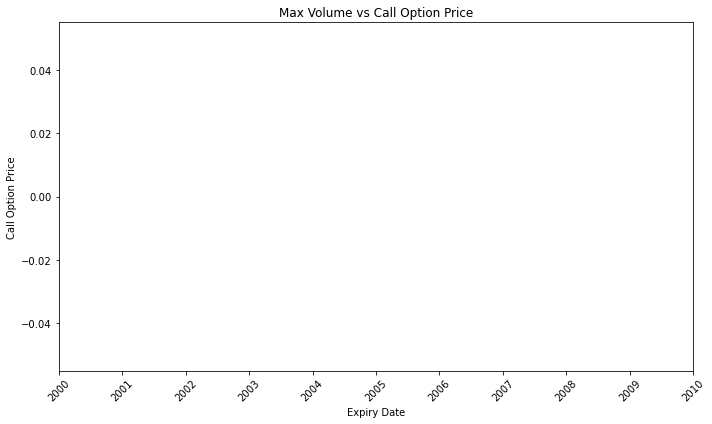

In [ ]:
print(result_df)


Empty DataFrame
Columns: [EXPIRY_DT, CLOSE]
Index: []


In [ ]:
# Specify the path where you want to save the CSV file
output_path = "filtered_lt_option.csv"

# Repartition the DataFrame into a single partition
df_filtered_single_partition = df_filtered.coalesce(1)

# Save the filtered DataFrame as a CSV file
df_filtered_single_partition.write.csv(output_path, header=True, mode="overwrite")

# Print a message to confirm the CSV file has been saved
print(f"Filtered data has been saved to {output_path}")


Filtered data has been saved to filtered_lt_option.csv


In [ ]:
from pyspark.sql.functions import col

# Assuming futures_data is your DataFrame
futures_data = futures_data.withColumn("SETTLE_PR", col("SETTLE_PR").cast("double"))


In [ ]:
futures_data.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- STRIKE_PR: string (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: string (nullable = true)
 |-- HIGH: string (nullable = true)
 |-- LOW: string (nullable = true)
 |-- CLOSE: string (nullable = true)
 |-- SETTLE_PR: double (nullable = true)
 |-- CONTRACTS: string (nullable = true)
 |-- VAL_INLAKH: string (nullable = true)
 |-- OPEN_INT: string (nullable = true)
 |-- CHG_IN_OI: string (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- Unnamed: 15: string (nullable = true)



##### Now clean the FUTIDX data frame where the option type is xx

In [ ]:
futures_data.show(vertical=True)

-RECORD 0------------------
 INSTRUMENT  | FUTIDX      
 SYMBOL      | BANKNIFTY   
 EXPIRY_DT   | 24-Sep-2020 
 STRIKE_PR   | 0.0         
 OPTION_TYP  | XX          
 OPEN        | 24900.05    
 HIGH        | 25270.0     
 LOW         | 23371.0     
 CLOSE       | 23743.0     
 SETTLE_PR   | 23743.0     
 CONTRACTS   | 504222      
 VAL_INLAKH  | 3051593.27  
 OPEN_INT    | 1432850     
 CHG_IN_OI   | -54500      
 TIMESTAMP   | 31-AUG-2020 
 Unnamed: 15 | null        
-RECORD 1------------------
 INSTRUMENT  | FUTIDX      
 SYMBOL      | BANKNIFTY   
 EXPIRY_DT   | 29-Oct-2020 
 STRIKE_PR   | 0.0         
 OPTION_TYP  | XX          
 OPEN        | 24937.55    
 HIGH        | 25315.9     
 LOW         | 23391.9     
 CLOSE       | 23770.1     
 SETTLE_PR   | 23770.1     
 CONTRACTS   | 10630       
 VAL_INLAKH  | 64526.57    
 OPEN_INT    | 91375       
 CHG_IN_OI   | 19325       
 TIMESTAMP   | 31-AUG-2020 
 Unnamed: 15 | null        
-RECORD 2------------------
 INSTRUMENT  | FUTID

In [ ]:
futures_data.show()

+----------+---------+-----------+---------+----------+--------+--------+--------+--------+---------+---------+----------+--------+---------+-----------+-----------+
|INSTRUMENT|   SYMBOL|  EXPIRY_DT|STRIKE_PR|OPTION_TYP|    OPEN|    HIGH|     LOW|   CLOSE|SETTLE_PR|CONTRACTS|VAL_INLAKH|OPEN_INT|CHG_IN_OI|  TIMESTAMP|Unnamed: 15|
+----------+---------+-----------+---------+----------+--------+--------+--------+--------+---------+---------+----------+--------+---------+-----------+-----------+
|    FUTIDX|BANKNIFTY|24-Sep-2020|      0.0|        XX|24900.05| 25270.0| 23371.0| 23743.0|  23743.0|   504222|3051593.27| 1432850|   -54500|31-AUG-2020|       null|
|    FUTIDX|BANKNIFTY|29-Oct-2020|      0.0|        XX|24937.55| 25315.9| 23391.9| 23770.1|  23770.1|    10630|  64526.57|   91375|    19325|31-AUG-2020|       null|
|    FUTIDX|BANKNIFTY|26-Nov-2020|      0.0|        XX|24989.95|25280.75|23437.15| 23766.2|  23766.2|     1171|   7088.68|   14400|     8400|31-AUG-2020|       null|
|   

## Extract all the individual stock

In [ ]:
print(data)

       INSTRUMENT SYMBOL  EXPIRY_DT  STRIKE_PR OPTION_TYP  OPEN  HIGH  LOW  \
0          OPTSTK     LT 2020-09-24      680.0         CE   0.0   0.0  0.0   
1          OPTSTK     LT 2020-09-24      700.0         CE   0.0   0.0  0.0   
2          OPTSTK     LT 2020-09-24      720.0         CE   0.0   0.0  0.0   
3          OPTSTK     LT 2020-09-24      740.0         CE   0.0   0.0  0.0   
4          OPTSTK     LT 2020-09-24      760.0         CE   0.0   0.0  0.0   
...           ...    ...        ...        ...        ...   ...   ...  ...   
633049     OPTSTK     LT 2006-11-30     2500.0         PA   0.0   0.0  0.0   
633050     OPTSTK     LT 2006-11-30     2550.0         PA   0.0   0.0  0.0   
633051     OPTSTK     LT 2006-11-30     2600.0         PA   0.0   0.0  0.0   
633052     OPTSTK     LT 2006-11-30     2650.0         PA   0.0   0.0  0.0   
633053     OPTSTK     LT 2006-11-30     2700.0         PA   0.0   0.0  0.0   

         CLOSE  SETTLE_PR  CONTRACTS  VAL_INLAKH  OPEN_INT  CHG

In [ ]:
import csv
for name in industry_leader_in_each_sector:
  option_data_LT = data.filter( \
                        (data['SYMBOL'] == name) & \
                        (data['INSTRUMENT'] == 'OPTSTK') &
                        ~(col("OPEN") == 0) &  ~(col("HIGH") == 0) & \
                        ~(col("LOW") == 0) & \
                        ~(col("CLOSE") == 0) & \
                        ~(col("SETTLE_PR") == 0) & \
                        ~(col("CONTRACTS") == 0) & \
                        ~(col("VAL_INLAKH") == 0) & \
                        ~(col("OPEN_INT") == 0) & \
                        ~(col("CHG_IN_OI") == 0)
                        ).collect()
  header = ['INSTRUMENT','SYMBOL','EXPIRY_DT','STRIKE_PR','OPTION_TYP','OPEN','HIGH','LOW','CLOSE','SETTLE_PR','CONTRACTS','VAL_INLAKH','OPEN_INT','CHG_IN_OI','TIMESTAMP','Unnamed']
  with open(f'options/{name}_option.csv','w') as f:
      writer = csv.writer(f)
      writer.writerow(header)
      writer.writerows(option_data_LT)



In [5]:
! pip install pandas matplotlib seaborn


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
# Read CSV File
df = pd.read_csv('options/CIPLA_option.csv')

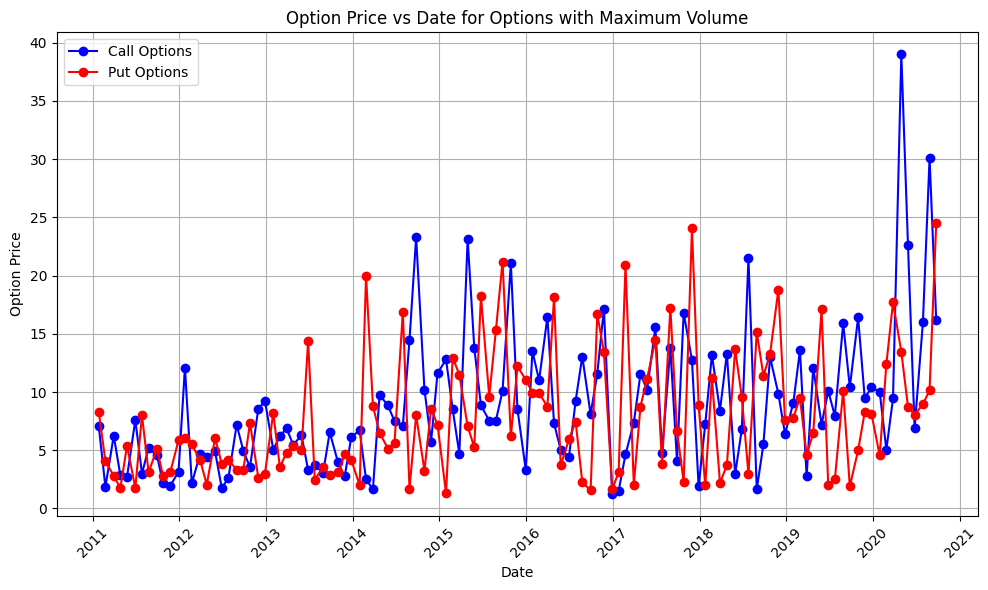

In [9]:


# Convert EXPIRY_DT column to datetime format
df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT'])

# Filter call and put options
call_options = df[df['OPTION_TYP'] == 'CE']
put_options = df[df['OPTION_TYP'] == 'PE']

# Group call options by date and find the row with maximum volume for each date
max_volume_call = call_options.loc[call_options.groupby('EXPIRY_DT')['CONTRACTS'].idxmax()]

# Group put options by date and find the row with maximum volume for each date
max_volume_put = put_options.loc[put_options.groupby('EXPIRY_DT')['CONTRACTS'].idxmax()]

# Plot
plt.figure(figsize=(10, 6))

# Plot call options
plt.plot(max_volume_call['EXPIRY_DT'], max_volume_call['CLOSE'], marker='o', linestyle='-', color='blue', label='Call Options')

# Plot put options
plt.plot(max_volume_put['EXPIRY_DT'], max_volume_put['CLOSE'], marker='o', linestyle='-', color='red', label='Put Options')

plt.xlabel('Date')
plt.ylabel('Option Price')
plt.title(f'Option Price vs Date for Options with Maximum Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


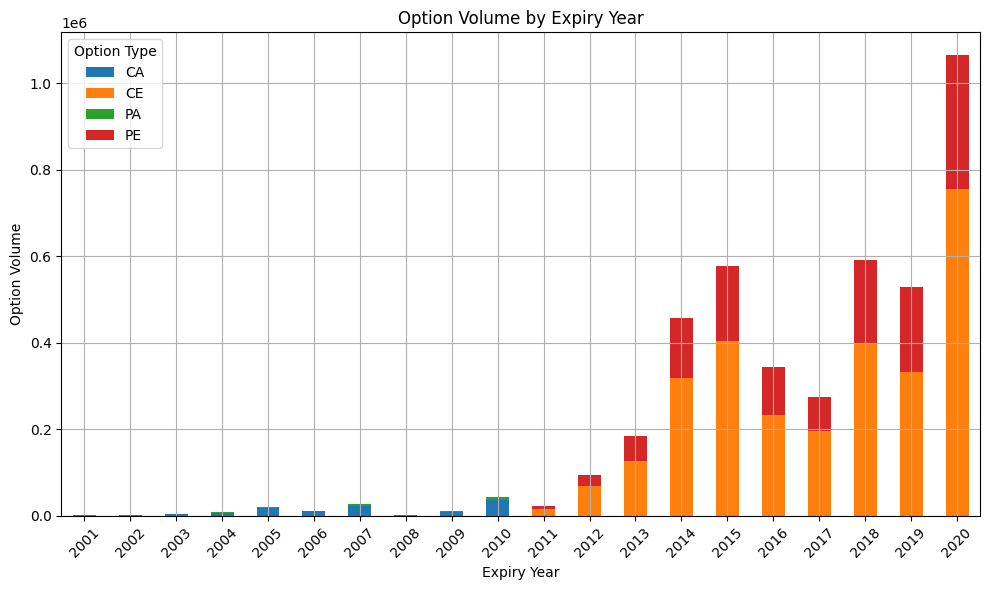

In [12]:
# Convert EXPIRY_DT column to datetime format
df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT'])

# Group the data by EXPIRY_DT and OPTION_TYP and calculate the total volume of call and put options
grouped_data = df.groupby([df['EXPIRY_DT'].dt.year, 'OPTION_TYP'])['CONTRACTS'].sum().unstack().fillna(0)

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Expiry Year')
plt.ylabel('Option Volume')
plt.title('Option Volume by Expiry Year')
plt.xticks(rotation=45)
plt.legend(title='Option Type')
plt.grid(True)
plt.tight_layout()
plt.show()

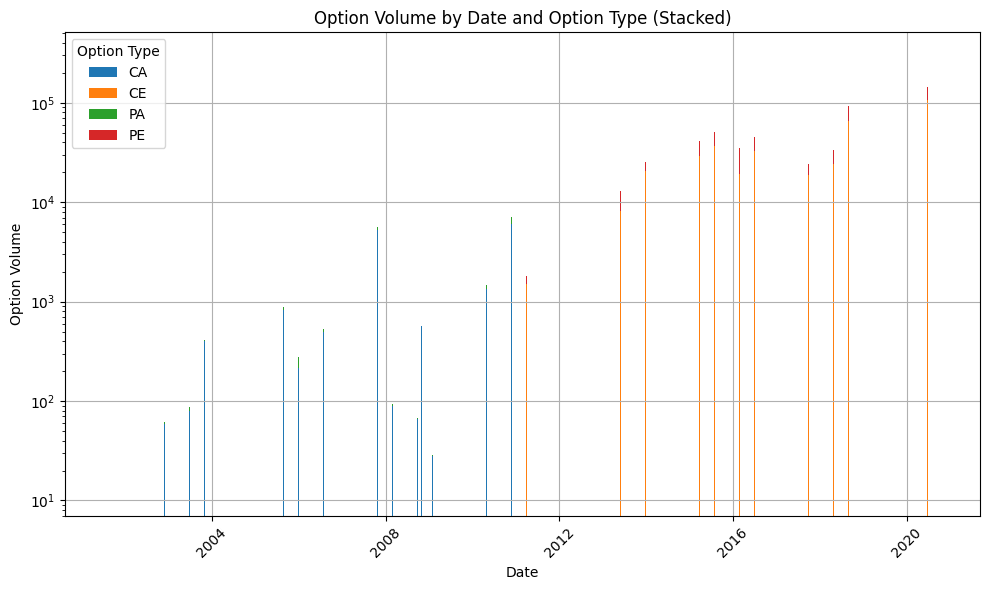

In [16]:
df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT'])

# Group the data by date and option type and calculate the total volume of options
grouped_data = df.groupby(['EXPIRY_DT', 'OPTION_TYP'])['CONTRACTS'].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(10, 6))
bottom = None
for option_type in grouped_data.columns:
    plt.bar(grouped_data.index, grouped_data[option_type], label=option_type, bottom=bottom)
    if bottom is None:
        bottom = grouped_data[option_type]
    else:
        bottom += grouped_data[option_type]

plt.xlabel('Date')
plt.ylabel('Option Volume')
plt.title('Option Volume by Date and Option Type (Stacked)')
plt.legend(title='Option Type')
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

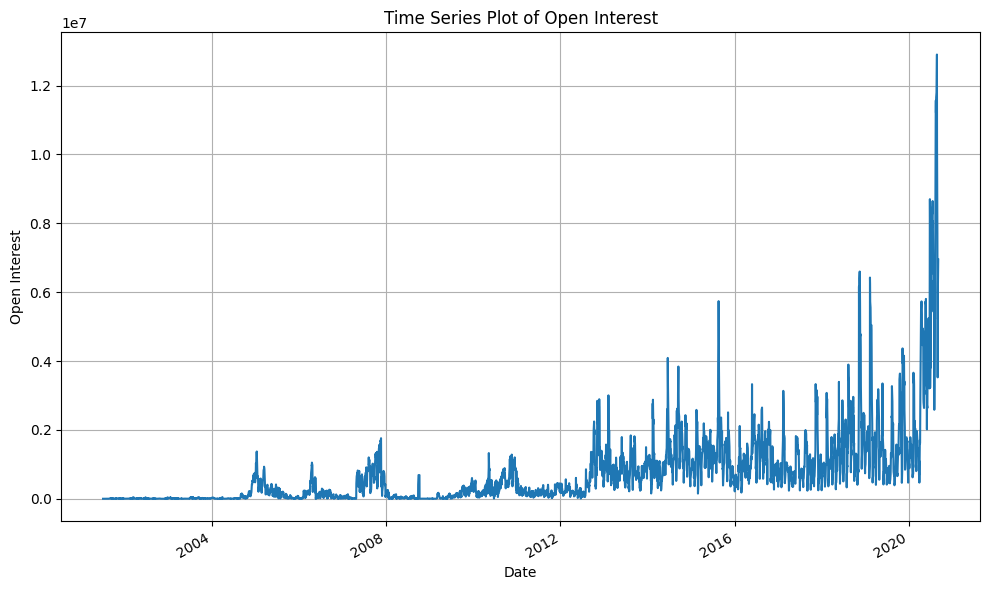

In [17]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Group the data by 'TIMESTAMP' and calculate the sum of 'OPEN_INT' for each timestamp
open_interest_series = df.groupby('TIMESTAMP')['OPEN_INT'].sum()

# Plot
plt.figure(figsize=(10, 6))
open_interest_series.plot()
plt.xlabel('Date')
plt.ylabel('Open Interest')
plt.title('Time Series Plot of Open Interest')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns


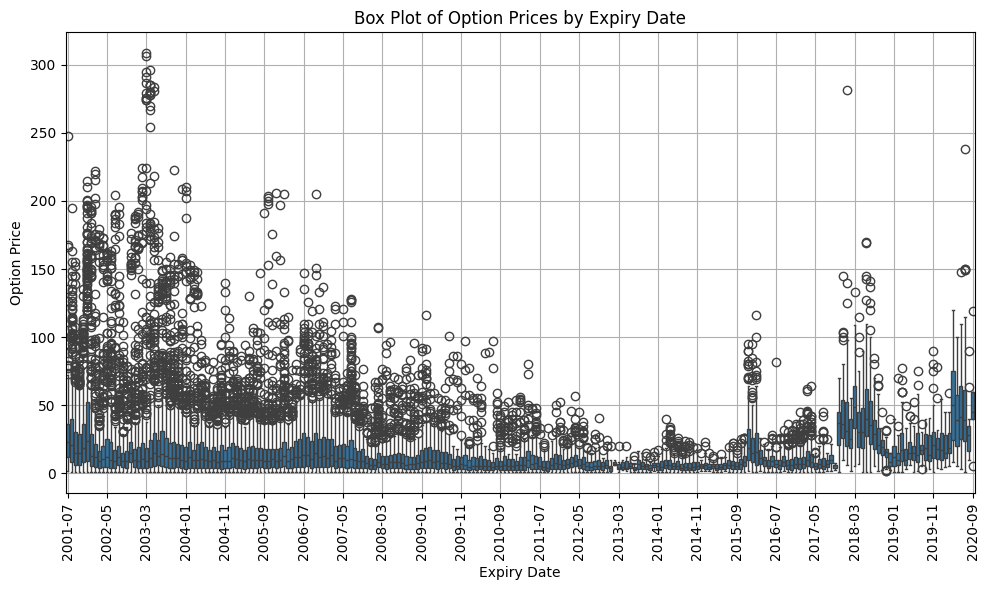

In [26]:
df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT'])

# Group the data by EXPIRY_DT and calculate the median option price for each expiry date
grouped_data = df.groupby('EXPIRY_DT')['CLOSE'].median().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='EXPIRY_DT', y='CLOSE', data=df)
plt.xlabel('Expiry Date')
plt.ylabel('Option Price')
plt.title('Box Plot of Option Prices by Expiry Date')
plt.xticks(rotation=90)

# Customize x-axis ticks to display every n-th date
n = 10  # Display every 30th date
plt.xticks(range(0, len(grouped_data), n), grouped_data['EXPIRY_DT'].dt.strftime('%Y-%m').iloc[::n])

plt.grid(True)
plt.tight_layout()
plt.show()

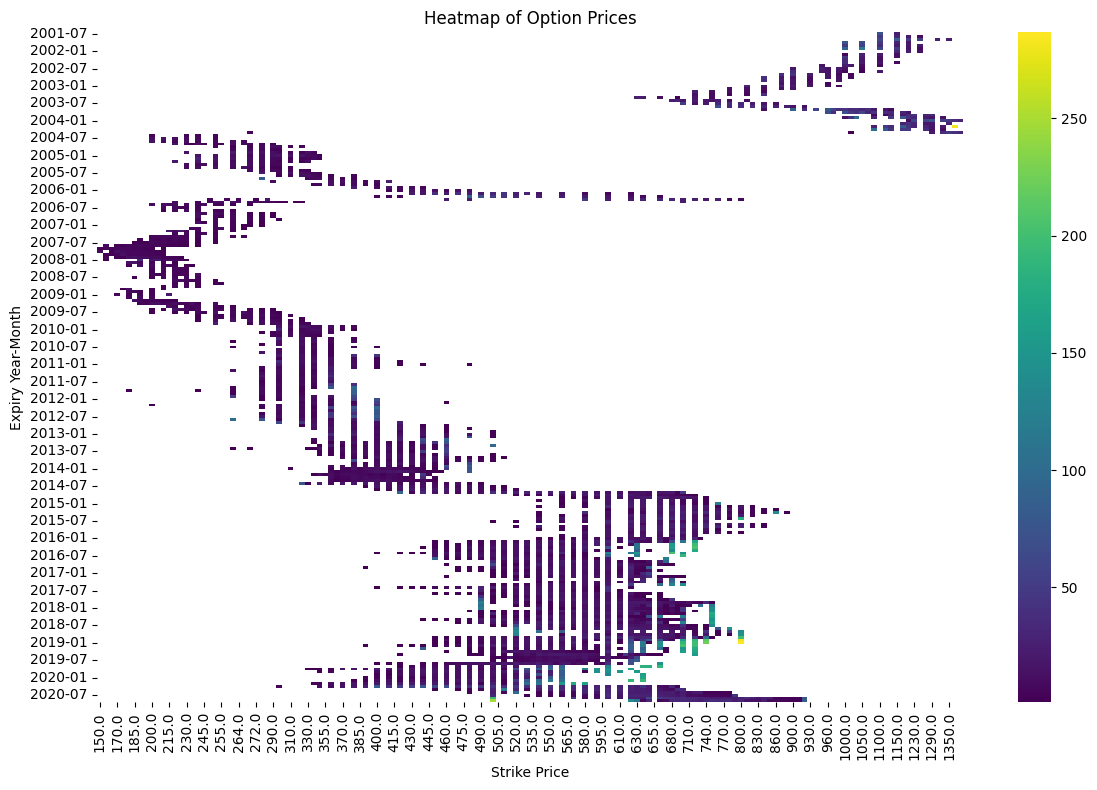

In [30]:

# Convert EXPIRY_DT column to datetime format
df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT'])

# Extract year and month from the expiry dates
df['Year_Month'] = df['EXPIRY_DT'].dt.to_period('M')

# Pivot the data to create a matrix where rows are expiration dates, columns are strike prices, and values are option prices
heatmap_data = df.pivot_table(index='Year_Month', columns='STRIKE_PR', values='CLOSE', aggfunc='mean')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('Strike Price')
plt.ylabel('Expiry Year-Month')
plt.title('Heatmap of Option Prices')
plt.tight_layout()
plt.show()
